In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("adult-income.csv")

In [3]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
# Examining the columns and their types.

In [5]:
df["age"]

0        25
1        38
2        28
3        44
4        18
         ..
48837    27
48838    40
48839    58
48840    22
48841    52
Name: age, Length: 48842, dtype: int64

In [6]:
df["occupation"]

0        Machine-op-inspct
1          Farming-fishing
2          Protective-serv
3        Machine-op-inspct
4                        ?
               ...        
48837         Tech-support
48838    Machine-op-inspct
48839         Adm-clerical
48840         Adm-clerical
48841      Exec-managerial
Name: occupation, Length: 48842, dtype: object

In [7]:
df["occupation"].unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

In [8]:
df["hours-per-week"]

0        40
1        50
2        40
3        40
4        30
         ..
48837    38
48838    40
48839    40
48840    20
48841    40
Name: hours-per-week, Length: 48842, dtype: int64

In [9]:
df["education"]

0                11th
1             HS-grad
2          Assoc-acdm
3        Some-college
4        Some-college
             ...     
48837      Assoc-acdm
48838         HS-grad
48839         HS-grad
48840         HS-grad
48841         HS-grad
Name: education, Length: 48842, dtype: object

In [10]:
df["education"].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [11]:
df["educational-num"]

0         7
1         9
2        12
3        10
4        10
         ..
48837    12
48838     9
48839     9
48840     9
48841     9
Name: educational-num, Length: 48842, dtype: int64

In [12]:
df["income"]

0        <=50K
1        <=50K
2         >50K
3         >50K
4        <=50K
         ...  
48837    <=50K
48838     >50K
48839    <=50K
48840    <=50K
48841     >50K
Name: income, Length: 48842, dtype: object

In [13]:
df["income"] = df["income"].apply(lambda x: 1 if x == "<=50K" else 0)

In [14]:
df["income"]

0        1
1        1
2        0
3        0
4        1
        ..
48837    1
48838    0
48839    1
48840    1
48841    0
Name: income, Length: 48842, dtype: int64

In [15]:
# Splitting the whole data into train and test data.

In [16]:
train, test = train_test_split(df, test_size=0.2)

In [17]:
train

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
4069,20,Private,164529,11th,7,Never-married,Farming-fishing,Own-child,Black,Male,0,0,40,United-States,1
41966,36,?,205396,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,0,4,United-States,1
10170,26,Private,152263,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Female,0,0,45,United-States,1
1423,23,Private,64520,10th,6,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,1
24923,44,Private,164043,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28057,35,Private,272338,Assoc-voc,11,Divorced,Prof-specialty,Unmarried,White,Female,0,0,40,United-States,1
21259,45,Private,339863,Bachelors,13,Divorced,Sales,Not-in-family,White,Male,8614,0,48,United-States,0
33956,68,Self-emp-not-inc,133736,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,20051,0,40,United-States,0
48035,26,State-gov,326033,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,80,United-States,1


In [18]:
test

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
23104,35,Private,125933,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,0
39782,29,Private,224421,Assoc-voc,11,Married-AF-spouse,Farming-fishing,Husband,White,Male,0,0,44,United-States,0
28899,44,Private,162184,Some-college,10,Separated,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,1
21082,50,?,22428,Masters,14,Never-married,?,Not-in-family,White,Male,0,0,40,United-States,1
43097,54,Private,35557,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,7298,0,50,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25749,40,State-gov,199381,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,15024,0,37,United-States,0
39330,65,Private,171584,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,40,United-States,1
17135,48,State-gov,327886,Doctorate,16,Divorced,Prof-specialty,Own-child,White,Male,0,0,50,United-States,0
25561,42,Self-emp-not-inc,133584,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,El-Salvador,1


In [19]:
# Performing firstly a linear regression.

In [20]:
y_train = train['income']
X_train = train[['educational-num', 'age', 'hours-per-week']]

In [21]:
X_train = sm.add_constant(X_train)

In [22]:
model = sm.OLS(y_train, X_train, missing='drop')
model_result = model.fit()
model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     3027.
Date:                Sun, 26 Jan 2025   Prob (F-statistic):               0.00
Time:                        01:48:11   Log-Likelihood:                -18132.
No. Observations:               39073   AIC:                         3.627e+04
Df Residuals:                   39069   BIC:                         3.631e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.7516      0.011    164.559      0.000       1.731       1.772
educational-num    -0.0503      0.001    -65.888      0.000      -0.052      -0.049
age                -0.0065      0.000    -45.937      0.000      -0.007      -0.006
hours-per-week     -0.0058      0.000    -36.177      0.000      -0.006      -0.005
==============================================================================
Omnibus:                     4120.113   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4893.547
Skew:                          -0.835   Prob(JB):                         0.00
Kurtosis:                       2.532   Cond. No.                         319.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: ylabel='Count'>

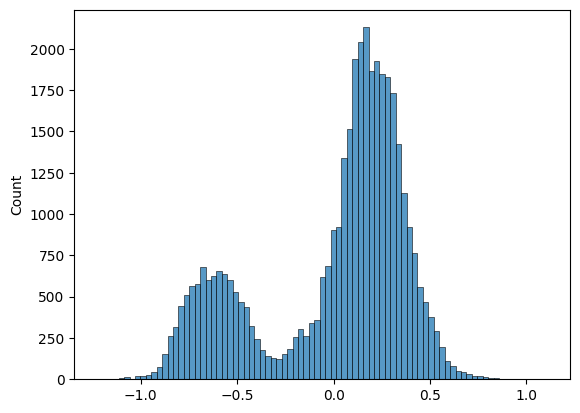

In [23]:
sns.histplot(model_result.resid)

In [24]:
mu, std = stats.norm.fit(model_result.resid)
mu, std

(np.float64(2.3024717915144826e-15), np.float64(0.38485936740265786))

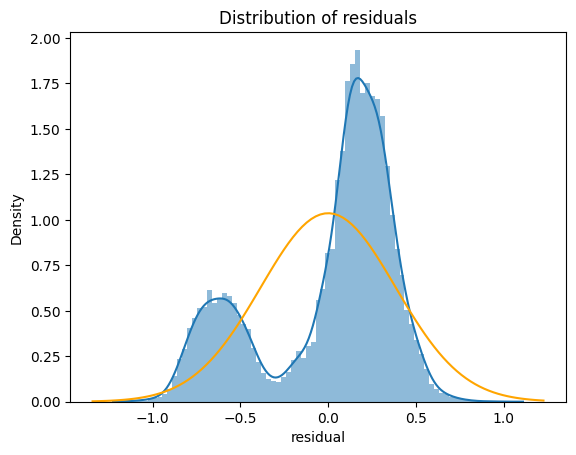

In [25]:
fig, ax = plt.subplots()
# plot the residuals
sns.histplot(x=model_result.resid, ax=ax, stat="density", linewidth=0, kde=True)
ax.set(title="Distribution of residuals", xlabel="residual")

# plot corresponding normal curve
xmin, xmax = plt.xlim() # the maximum x values from the histogram above
x = np.linspace(xmin, xmax, 100) # generate some x values
p = stats.norm.pdf(x, mu, std) # calculate the y values for the normal curve
sns.lineplot(x=x, y=p, color="orange", ax=ax)
plt.show()

In [26]:
# Applying the model to test data.

In [27]:
X_test = test[['educational-num', 'age', 'hours-per-week']]

In [28]:
X_test = sm.add_constant(X_test)

In [29]:
y_test = test['income']

In [30]:
y_pred = model_result.predict(X_test)

In [31]:
y_pred

23104    0.523660
39782    0.755539
28899    0.730661
21082    0.490232
43097    0.607693
           ...   
25749    0.572937
39330    0.442347
17135    0.345224
25561    0.743751
36351    0.717571
Length: 9769, dtype: float64

In [32]:
pd.concat([y_test, y_pred], axis=1)

,income,0
23104,0,0.523660
39782,0,0.755539
28899,1,0.730661
21082,1,0.490232
43097,0,0.607693
...,...,...
25749,0,0.572937
39330,1,0.442347
17135,0,0.345224
25561,1,0.743751


In [33]:
# I will look at the average of the absolute value of the errors.

### The performance on test data.

In [34]:
abs(y_test - y_pred).mean()

np.float64(0.3145105499655741)

### 0.314

In [35]:
model_result.get_prediction(X_test).summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
23104,0.523660,0.004128,0.515569,0.531751,-0.230756,1.278076
39782,0.755539,0.002554,0.750533,0.760545,0.001150,1.509928
28899,0.730661,0.002098,0.726549,0.734773,-0.023723,1.485045
21082,0.490232,0.003903,0.482583,0.497881,-0.264179,1.244643
43097,0.607693,0.003238,0.601345,0.614040,-0.146707,1.362092
...,...,...,...,...,...,...
25749,0.572937,0.003678,0.565728,0.580147,-0.181470,1.327344
39330,0.442347,0.004753,0.433030,0.451663,-0.312083,1.196777
17135,0.345224,0.005079,0.335270,0.355178,-0.409214,1.099662
25561,0.743751,0.002010,0.739811,0.747691,-0.010632,1.498134


In [36]:
# Secondly, we will try decision trees.

In [37]:
for i in range(1,20):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    y_pred_proba = clf.predict_proba
    print(i, abs(y_test - y_pred).mean())

1 0.2353362677858532
2 0.213123144641212
3 0.20442215170437097
4 0.20565052717780735
5 0.1996110144334118
6 0.20063466066127547
7 0.20196540075749822
8 0.20206776538028456
9 0.2054457979322346
10 0.2054457979322346
11 0.20984747671204831
12 0.21179240454498924
13 0.2134302385095711
14 0.2166035418159484
15 0.2175248234210257
16 0.22376906541099395
17 0.22704473334015765
18 0.22673763947179854
19 0.2286825673047395


### Note.
Decision trees perform somewhat better. Additionally, the optimum maximum depth is 5. From there and onwards, the model starts to overfit.

In [62]:
clf = tree.DecisionTreeClassifier(max_depth=5)

clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

y_pred_proba = clf.predict_proba

### The performance.

In [63]:
abs(y_test - y_pred).mean()

np.float64(0.1996110144334118)

In [64]:
print('Depth of the Decision Tree :', clf.get_depth())

Depth of the Decision Tree : 5


In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.40      0.49      2299
           1       0.83      0.92      0.88      7470

    accuracy                           0.80      9769
   macro avg       0.73      0.66      0.68      9769
weighted avg       0.78      0.80      0.78      9769



In [66]:
# And lastly, we will be interested in random forests.

In [67]:
clf = RandomForestClassifier() #number of trees: n_estimators=?

clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Number of Trees used : ', clf.n_estimators)

Number of Trees used :  100
